In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.8'

## The IMDB dataset

We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
train_data[0][:20]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25]

In [8]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [11]:
# word_index is a dictionary mapping 
word_index = imdb.get_word_index()
# create a reverse dictionary
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We decode the review:
#     note that our indices were offset by 3
#     because 0, 1, and 2 are reversed indices for "padding", "start of sequence", and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [13]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Prepare the data

In [26]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test =  vectorize_sequences(test_data)

In [27]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building our network

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

 This former can be done by passing an optimizer class instance as the optimizer argument:

In [31]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

The latter can be done by passing function objects as the `loss` or `metrics` arguments:

In [32]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating our approach

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 10,000 samples from the original training data:

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s - loss: 0.5157 - binary_accuracy: 0.7894 - val_loss: 0.4008 - val_binary_accuracy: 0.8656
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3146 - binary_accuracy: 0.9030 - val_loss: 0.3256 - val_binary_accuracy: 0.8781
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2320 - binary_accuracy: 0.9247 - val_loss: 0.2808 - val_binary_accuracy: 0.8924
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1816 - binary_accuracy: 0.9430 - val_loss: 0.2729 - val_binary_accuracy: 0.8909
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1496 - binary_accuracy: 0.9515 - val_loss: 0.2780 - val_binary_accuracy: 0.8888
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1210 - binary_accuracy: 0.9631 - val_loss: 0.3216 - val_binary_accuracy: 0.8804
Epoch 7/20
15000/15000 [====================

In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

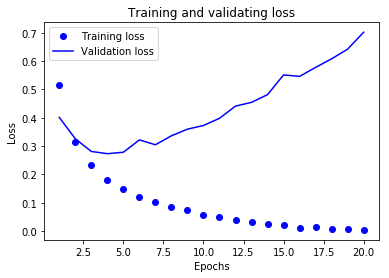

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, "bo", label="Training loss")
# "b" is for "solid blue line"
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validating loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

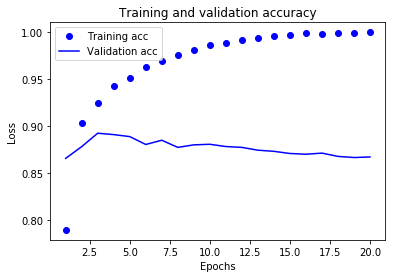

In [37]:
plt.clf() # clear figure

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s - loss: 0.4405 - acc: 0.8201     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2561 - acc: 0.9080     - ETA:
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.1943 - acc: 0.9328     
Epoch 4/4
24928/25000 [============================>.] - ETA: 0s

In [43]:
results

[0.30099991557598116, 0.88024000000000002]

## Using a trained network to generate predictions on new data

In [45]:
model.predict(x_test)

array([[ 0.93109405],
       [ 0.93845361],
       [ 0.99968374],
       ..., 
       [ 0.70662212],
       [ 0.00431662],
       [ 0.83757687]], dtype=float32)

## Feature experiments
  - we were useing 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
  - Try to use layers with more hidden units or less hidden: 32 units, 64 units
  - Try to use the mse loss function instead of `binary_crossentropy`
  - Try to use the tanh activation instead of `relu`

### try use MAE and without activation in last layer

In [54]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])


In [55]:
model.compile(optimizer='rmsprop',
              loss='mae',
              metrics=['accuracy'])


In [56]:
model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s - loss: 0.3133 - acc: 0.7506     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2006 - acc: 0.8859     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.1649 - acc: 0.9154     
Epoch 4/4
25000/25000 [==============================] - 2s - loss: 0.1429 - acc: 0.9320     


In [57]:
model.evaluate(x_test, y_test)

24960/25000 [============================>.] - ETA: 0s

[0.19765708856582642, 0.88124000000000002]